In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.12.0


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
data.shape

(284807, 31)

In [64]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [65]:
data['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [66]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [67]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251123,155229.0,-0.380097,0.947642,-0.772336,-0.443717,0.873774,-0.821833,1.007168,-0.211991,0.550825,...,0.143695,0.927982,-0.217375,-0.577027,-0.277710,-0.139845,0.437612,0.112958,36.96,0
94559,64941.0,0.315639,-1.873553,-0.271376,0.210546,-1.097918,-0.426159,0.525280,-0.312399,-1.319328,...,-0.507293,-2.192170,-0.098568,0.050238,-0.280093,-0.051428,-0.104394,0.112202,534.90,0
73711,55247.0,-0.210225,0.868597,1.011077,-0.380108,0.285469,-1.022654,0.713322,-0.054816,-0.603191,...,-0.025242,-0.133001,0.233054,0.492265,-1.327038,-0.294502,0.190934,0.240117,1.29,0
105080,69354.0,1.084398,-0.535410,1.084934,0.152174,-1.096997,0.021407,-0.715606,0.176406,1.100438,...,-0.063853,-0.066558,0.050895,0.161919,0.018469,1.015015,-0.027148,0.020859,54.95,0
240383,150581.0,-1.531934,0.844720,1.175606,-2.942159,0.537830,0.512038,0.763688,-0.623355,1.633585,...,-0.173283,-0.574857,-0.400225,-0.150363,0.257737,-0.541954,-1.655074,-0.325596,21.11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254369,156697.0,2.060392,-0.009420,-1.049461,0.413470,-0.095811,-1.204543,0.226668,-0.369806,0.450254,...,-0.281262,-0.648938,0.333350,0.062732,-0.279665,0.193283,-0.066981,-0.058406,2.69,0
170559,120239.0,-1.134875,0.082667,1.511460,0.946787,0.953836,0.399054,0.863692,-0.758646,1.482866,...,-0.696472,-0.899799,-0.054310,-0.496651,-0.972386,-1.151922,-0.878087,-0.497372,28.99,0
26832,34271.0,-2.660875,0.830548,-0.683926,3.338431,-0.817206,-0.812760,-0.281842,1.171210,-1.364492,...,0.087378,-0.102958,-0.305065,0.415694,-0.332625,0.159028,0.309467,-0.178469,100.00,0
123749,77048.0,0.810008,-0.159623,0.372520,1.379975,-0.658099,-1.250628,0.625300,-0.331434,-0.218907,...,-0.311788,-1.391676,0.108744,0.850906,0.122000,-0.907591,-0.022898,0.070411,206.35,0


In [68]:
data = pd.concat([fraud, non_fraud])
data.shape

(984, 31)

In [69]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254369,156697.0,2.060392,-0.009420,-1.049461,0.413470,-0.095811,-1.204543,0.226668,-0.369806,0.450254,...,-0.281262,-0.648938,0.333350,0.062732,-0.279665,0.193283,-0.066981,-0.058406,2.69,0
170559,120239.0,-1.134875,0.082667,1.511460,0.946787,0.953836,0.399054,0.863692,-0.758646,1.482866,...,-0.696472,-0.899799,-0.054310,-0.496651,-0.972386,-1.151922,-0.878087,-0.497372,28.99,0
26832,34271.0,-2.660875,0.830548,-0.683926,3.338431,-0.817206,-0.812760,-0.281842,1.171210,-1.364492,...,0.087378,-0.102958,-0.305065,0.415694,-0.332625,0.159028,0.309467,-0.178469,100.00,0
123749,77048.0,0.810008,-0.159623,0.372520,1.379975,-0.658099,-1.250628,0.625300,-0.331434,-0.218907,...,-0.311788,-1.391676,0.108744,0.850906,0.122000,-0.907591,-0.022898,0.070411,206.35,0


In [70]:
data['Class'].value_counts()


Class
1    492
0    492
Name: count, dtype: int64

In [71]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [75]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

In [88]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_10 (Bat  (None, 29, 32)           128       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_11 (Bat  (None, 28, 64)           256       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 28, 64)           

In [89]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 0.4194 - accuracy: 0.8272 - val_loss: 0.5114 - val_accuracy: 0.8883
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9225 - val_loss: 0.4763 - val_accuracy: 0.9086
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2135 - accuracy: 0.9301 - val_loss: 0.4168 - val_accuracy: 0.8934
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1801 - accuracy: 0.9352 - val_loss: 0.3993 - val_accuracy: 0.8528
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1912 - accuracy: 0.9339 - val_loss: 0.3336 - val_accuracy: 0.8883
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 0.9390 - val_loss: 0.3377 - val_accuracy: 0.8883
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1466 - accuracy: 0.9517 - val_loss: 0.3308 - val_accuracy: 0.8731
Epoch 8/50
25/25 [==

In [86]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

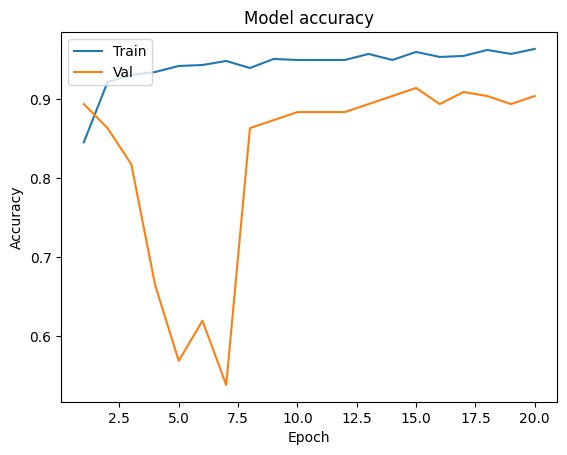

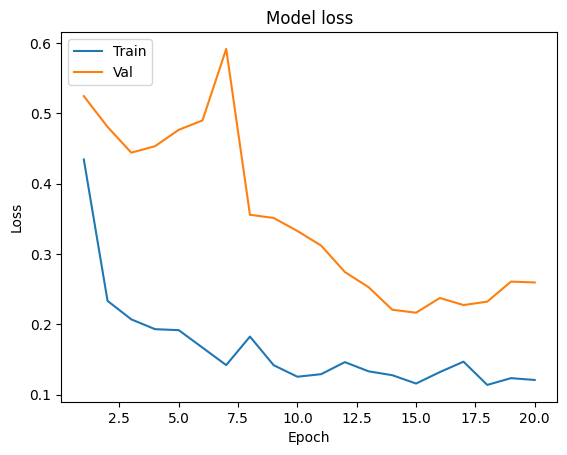

In [87]:
plot_learningCurve(history, epochs)
